<center><h1><b>Lecture 5</b></h1></center>
<center><h1><b>Randomized Trials and Hypothesis Checking</b></h1></center>

<center><h4>Time: T2 (09:00 ~ 09:50) and R78 (15:30 ~ 17:20)</h4></center>

<center><h2>Chieh-En Lee<sup>1</sup> (李杰恩) and Chung-Hao Tien<sup>2</sup> (田仲豪)</h2></center>

<center>
<h4>{<a href="mailto:celee@nycu.edu.tw">celee</a><sup>1</sup>, 
<a href="mailto:chtien@nycu.edu.tw">chtien</a><sup>2</sup>}@nycu.edu.tw</h4>
</center>

<center><h3><a href="https://dop.nycu.edu.tw/ch/index.html">Department of Photonics</a>, <a href="https://www.nycu.edu.tw/">NYCU</a></h3></center>

<br />
<center><h5><a href="https://github.com/bruce88617/nycudopcs_advanced">Data Science and Python Programming</a>, 2024 Spring</h5></center>


## Last Time

- Law of large numbers
- Monte Carlo method
- Sampling
- The central limit theorem (CLT) and confidence interval

## **Today**

<ul>
  <li><a href="#tag1">Randomized trials</a></li>
  <li><a href="#tag2">Hypothesis checking</a></li>
</ul>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("./data/example1.npz")

treatmentHeights, controlHeights = data["treatmentHeights"], data["controlHeights"]

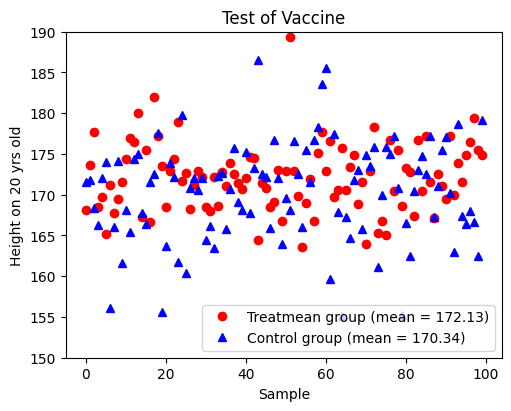

In [2]:
fig = plt.figure(figsize=(5,4), dpi=100, layout="constrained", facecolor="w")
    
ax1 = fig.add_subplot(111)

ax1.plot(treatmentHeights, 'ro', label="Treatmean group (mean = {:.02f})".format(np.mean(treatmentHeights)))
ax1.plot(controlHeights, 'b^', label="Control group (mean = {:.02f})".format(np.mean(controlHeights)))
ax1.set_title("Test of Vaccine")
ax1.set_xlabel("Sample")
ax1.set_ylabel("Height on 20 yrs old")
ax1.set_ylim([150, 190])
ax1.legend(loc="best")
    
plt.show()

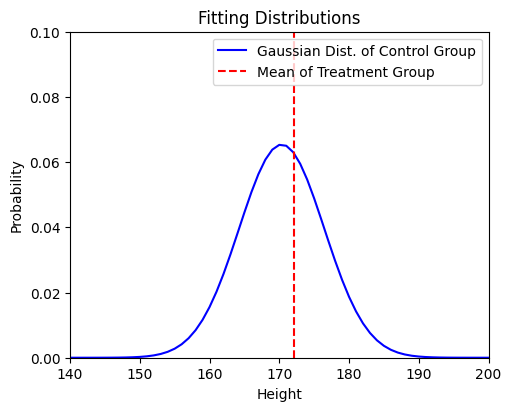

In [3]:
from scripts.basicFuncs import gaussDist, calProb

mTreat, sTreat = np.mean(treatmentHeights), np.std(treatmentHeights)
mControl, sControl = np.mean(controlHeights), np.std(controlHeights)

x = np.linspace(100, 200, 101)

fig = plt.figure(figsize=(5,4), dpi=100, layout="constrained", facecolor="w")
ax1 = fig.add_subplot(111)
ax1.plot(x, gaussDist(x, mu=mControl, sigma=sControl), 'b', label="Gaussian Dist. of Control Group")
ax1.vlines(mTreat, ymin=0, ymax=0.1, colors='r', linestyles='dashed', label="Mean of Treatment Group")
ax1.set_title("Fitting Distributions")
ax1.set_xlabel("Height")
ax1.set_ylabel("Probability")
ax1.set_xlim([140, 200])
ax1.set_ylim([0, 0.1])
ax1.legend(loc="best")
    
plt.show()

z-value = 3.865
Probability = 0.00011


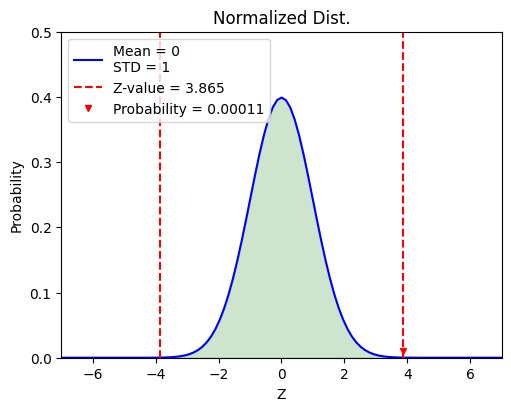

In [4]:
zValue = (mTreat - 170) / (5.5/np.sqrt(100))
pValue = calProb(zValue)

print("z-value = {:.03f}".format(zValue))
print("Probability = {:.05f}".format(pValue))

x = np.linspace(-7, 7, 101)
x2 = np.linspace(-zValue, zValue, 101)

fig = plt.figure(figsize=(5,4), dpi=100, layout="constrained", facecolor="w")
ax1 = fig.add_subplot(111)
ax1.plot(x, gaussDist(x), 'b', label="Mean = {}\nSTD = {}".format(0, 1))
ax1.vlines([-zValue, zValue], ymin=0, ymax=0.5, colors='r', linestyles='dashed', label="Z-value = {:.03f}".format(zValue))
ax1.plot(zValue, pValue+0.01, 'rv', markersize=5, label="Probability = {:.05f}".format(pValue))
ax1.fill_between(x2, y1=gaussDist(x2), y2=0, color='g', alpha=0.2)
ax1.set_title("Normalized Distribution")
ax1.set_xlabel("Z")
ax1.set_ylabel("Probability")
ax1.set_xlim([-7, 7])
ax1.set_ylim([0, 0.5])
ax1.legend(loc=2)    # upper left
    
plt.show()